<a href="https://www.kaggle.com/taha3012000/heart-attack?scriptVersionId=89257228" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
data=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
data.shape

(303, 14)

 1 duplicated value

In [4]:
data.duplicated().sum()

1

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


no missing values

In [7]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

overview

In [8]:

profile= pandas_profiling.ProfileReport(data)
profile.to_file('file.html')

profile

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Correlating features using pivoting

75% of men are more likely to have a heart attack,44.6% of women

In [9]:

data[['sex','output']].groupby(['sex'],as_index=False).mean().sort_values(by='output',ascending=0)

sex    output
0    0  0.750000
1    1  0.446602

82% are more likely to have Typical Angin

79% are more likely to have Atypical Angina

96% are more likely to have Non-anginal Pain

27% are more likely to have Asymptomatic

In [10]:
data[['cp','output']].groupby(['cp'],as_index=False).mean().sort_values(by='output',ascending=0)

cp    output
1   1  0.820000
2   2  0.790698
3   3  0.695652
0   0  0.272727

In [11]:
data[['fbs','output']].groupby(['fbs'],as_index=False).mean().sort_values(by='output',ascending=0)

fbs    output
0    0  0.548638
1    1  0.511111

In [12]:
data[['restecg','output']].groupby(['restecg'],as_index=False).mean().sort_values(by='output',ascending=0)

restecg    output
1        1  0.629139
0        0  0.462585
2        2  0.250000

In [13]:
data[['exng','output']].groupby(['exng'],as_index=False).mean().sort_values(by='output',ascending=0)

exng    output
0     0  0.694581
1     1  0.232323

In [14]:
data[['slp','output']].groupby(['slp'],as_index=False).mean().sort_values(by='output',ascending=0)

slp    output
2    2  0.751773
0    0  0.428571
1    1  0.350000

In [15]:
data[['caa','output']].groupby(['caa'],as_index=False).mean().sort_values(by='output',ascending=0)

caa    output
4    4  0.750000
0    0  0.742857
1    1  0.323077
2    2  0.184211
3    3  0.150000

In [16]:
data[['thall','output']].groupby(['thall'],as_index=False).mean().sort_values(by='output',ascending=0)

thall    output
2      2  0.781818
0      0  0.500000
1      1  0.333333
3      3  0.239316

In [17]:
data['age'].unique()


array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [18]:
data.loc[data['age']<=45,'age']=0
data.loc[(data['age']>45)&(data['age']<=60),'age']=1
data.loc[(data['age']>60)&(data['age']<=75),'age']=2
data.loc[data['age']>75,'age']=3
data['age']=data['age'].astype(int)
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    2    1   3     145   233    1        0       150     0      2.3    0   
1    0    1   2     130   250    0        1       187     0      3.5    0   
2    0    0   1     130   204    0        0       172     0      1.4    2   
3    1    1   1     120   236    0        1       178     0      0.8    2   
4    1    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [19]:
data[['age','output']].groupby(['age'],as_index=False).mean().sort_values(by='output',ascending=0)

age    output
0    0  0.746032
1    1  0.512500
3    3  0.500000
2    2  0.441558

In [20]:
fig = px.scatter_matrix(data, color="output",width=1000, height=1000)
fig.show()

<Figure size 1800x1440 with 0 Axes>

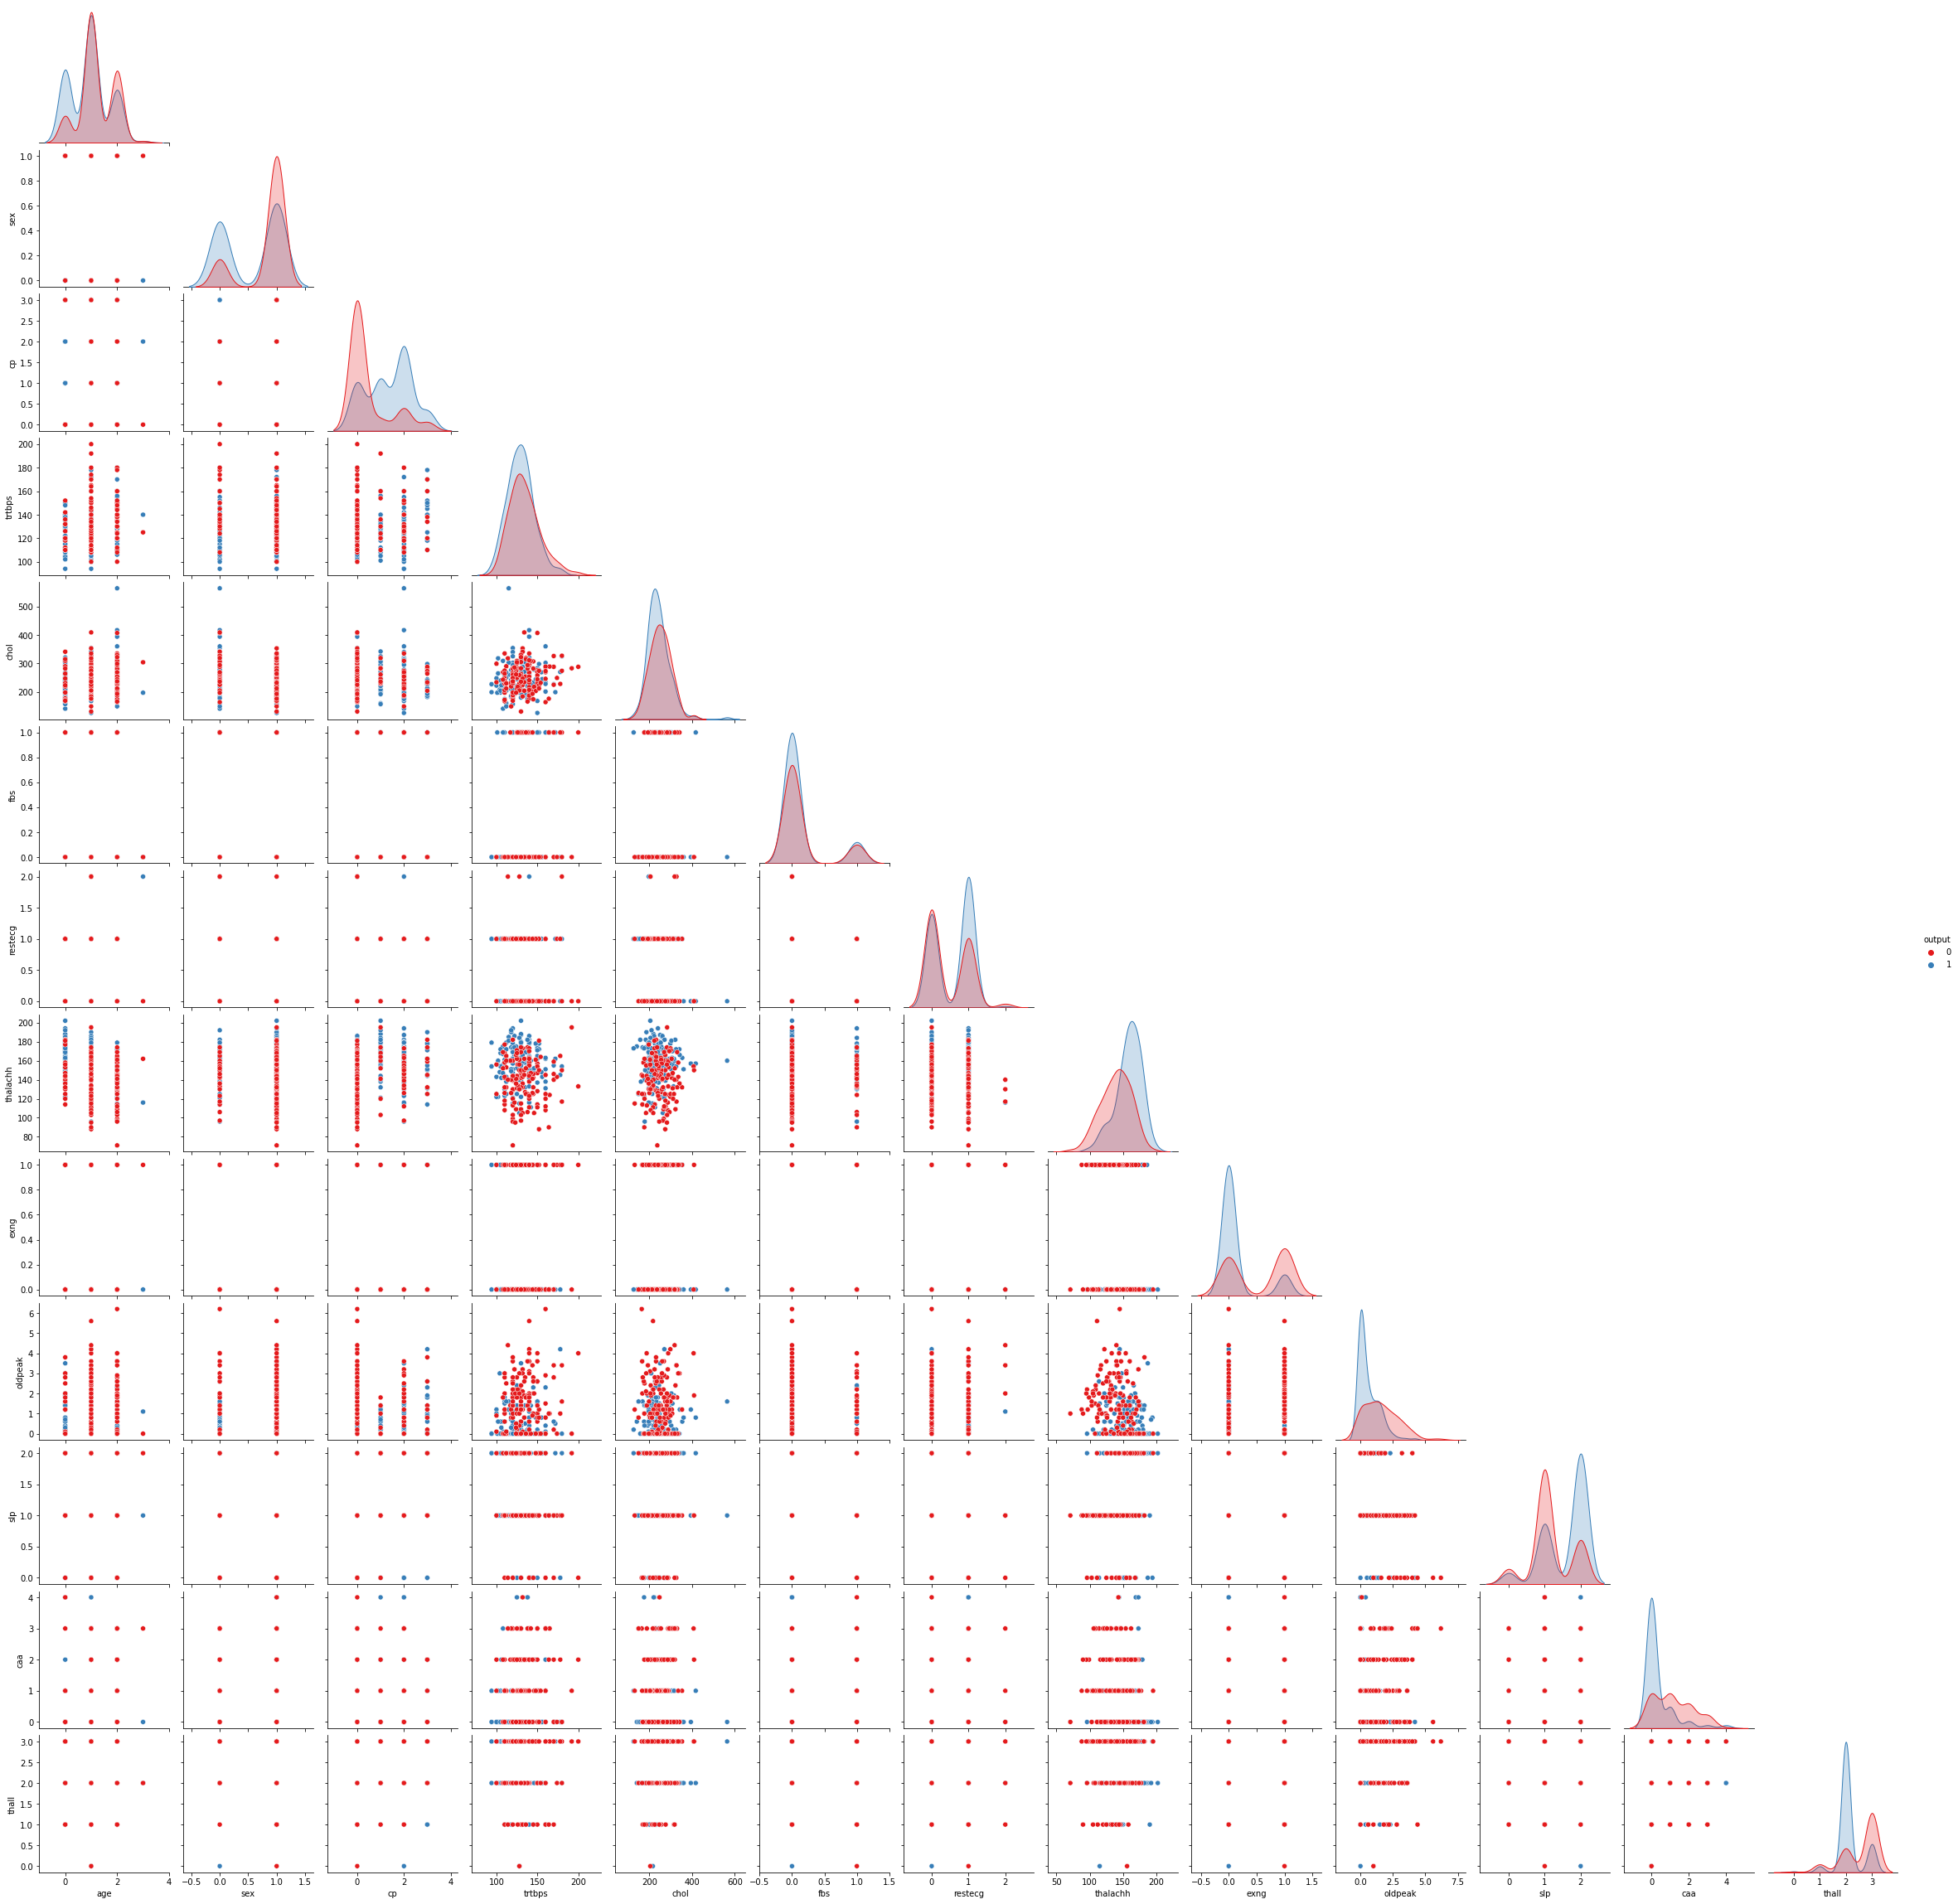

In [21]:
plt.figure(figsize=(25,20))
sns.pairplot(data , hue='output' , palette='Set1' , corner = True)

<AxesSubplot:>

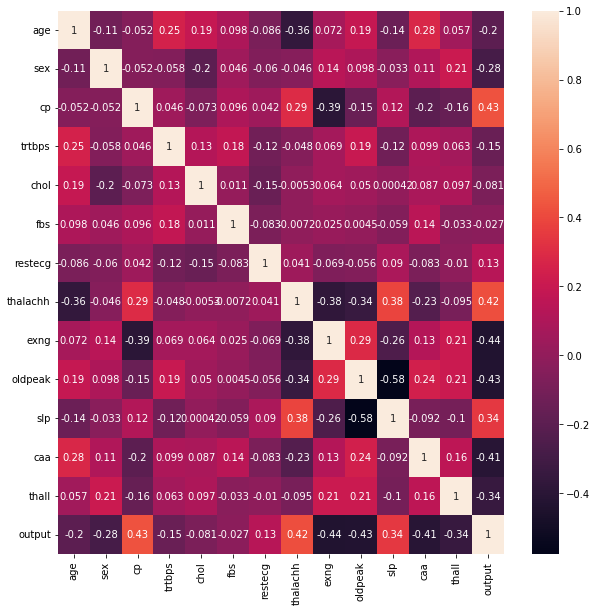

In [22]:
plt.figure(figsize=(10,10))
corr=data.corr()
sns.heatmap(corr,annot=True)

Handling outliers

In [23]:
outlier_percentage = {}
for feature in ['trtbps', 'chol', 'thalachh','oldpeak']:
    tempData = data.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'trtbps': 2.98, 'chol': 1.66, 'thalachh': 0.33, 'oldpeak': 1.66}

In [24]:
outlier = data[(data[feature]>Lower_range) & (data[feature]<Upper_range)].reset_index(drop=True)


In [25]:
X=data.drop('output',axis=1)
y=data['output']

Feature selection

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
ex.fit(X,y)

ExtraTreesClassifier()

In [27]:
ex.feature_importances_


array([0.04249601, 0.05469774, 0.12903292, 0.06487865, 0.06770385,
       0.02131999, 0.03708171, 0.08348242, 0.10115422, 0.08774705,
       0.06966165, 0.13628094, 0.10446283])

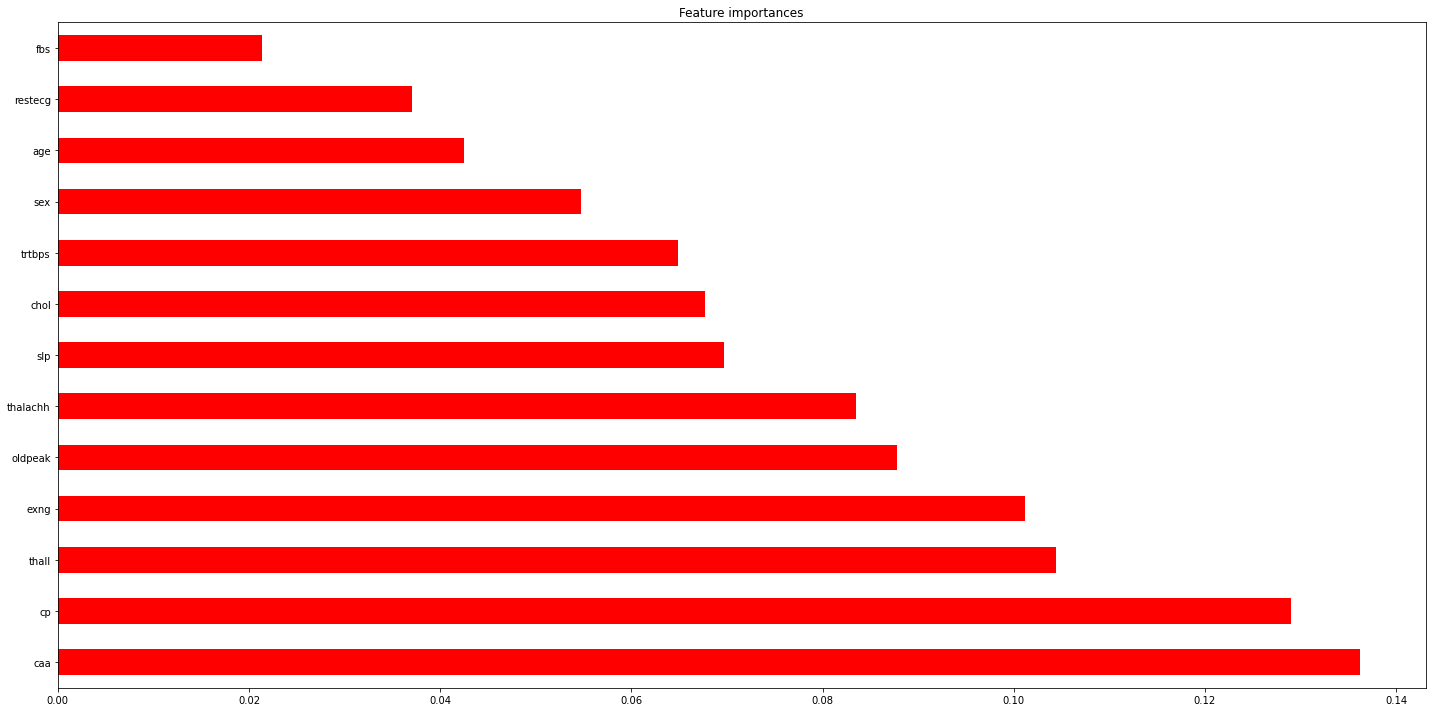

In [28]:
plt.figure(figsize=(20,10))
plt.title('Feature importances')
feat=pd.Series(ex.feature_importances_,index=X.columns)
feat.nlargest(14).plot(kind='barh', color="r", align="center")
plt.tight_layout()
plt.show()

drop lowest

In [29]:
data.drop(['fbs'],axis=1,inplace=True)

**Modeling**

In [30]:
from sklearn.model_selection import train_test_split ,cross_val_score,RandomizedSearchCV
X_train ,X_test,y_train ,y_test =train_test_split(X,y,test_size =.2 , random_state=42 , stratify=y)

Feature scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier

In [33]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting Classifier':GradientBoostingClassifier(),
         'Support Vector Machine': SVC(),
         'Stochastic Gradien Descent': SGDClassifier(),
         'Naive Bayes': GaussianNB(),
         'xgb Classifier': XGBClassifier(),
         'Cat Boost': CatBoostClassifier()}

In [34]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=5
                                            ).mean()

    return model_scores

In [35]:
model_scores = fit_score(models,X_train,X_test,y_train,y_test)

model_scores

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:18:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[08:18:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:18:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:18:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:18:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

{'Logistic Regression': 0.7410256410256411,
 'KNN': 0.7397435897435898,
 'Decision Tree': 0.6576923076923076,
 'Random Forest': 0.7064102564102563,
 'Gradient Boosting Classifier': 0.7064102564102565,
 'Support Vector Machine': 0.7551282051282051,
 'Stochastic Gradien Descent': 0.6576923076923078,
 'Naive Bayes': 0.7397435897435897,
 'xgb Classifier': 0.7243589743589743,
 'Cat Boost': 0.7064102564102563}

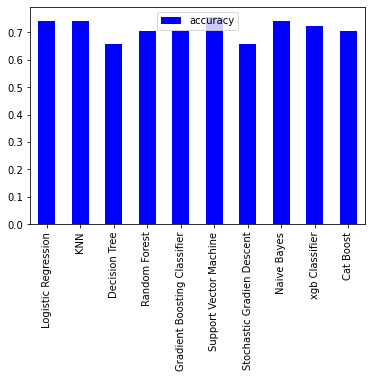

In [36]:
models = pd.DataFrame(model_scores, index=["accuracy"])
models.T.plot.bar(color="blue");

In [37]:
np.random.seed(42)
params = {"n_estimators": [50,100,200, 300,400 ] ,
 "max_depth": [ 3,5,7,9,10],
 "max_features" : [ 'auto', 'sqrt', 'log2']}


rs = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=params,
                                cv=3,
                                n_iter=100,
                                verbose=0,
                              refit=True,
                                n_jobs=-1
                               )

rs.fit(X_train, y_train)

rs.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning:

The total space of parameters 75 is smaller than n_iter=100. Running 75 iterations. For exhaustive searches, use GridSearchCV.



{'n_estimators': 400, 'max_features': 'auto', 'max_depth': 3}

In [38]:
rs.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=400)

In [39]:
rs.best_score_

0.8467592592592593

In [40]:
rs.score(X_test, y_test)


0.819672131147541

In [41]:
np.random.seed(42)
params = {"gamma": ['scale','auto' ] ,
 "C": [ .1,1,10,50,100],
 "degree" : [ 1, 2, 3,4,5],
         "kernel":['linear','poly','sigmoid','rbf']}


svc = RandomizedSearchCV(SVC(),
                                param_distributions=params,
                                cv=3,
                                n_iter=100,
                                verbose=0,
                              refit=True,
                                n_jobs=-1
                               )

svc.fit(X_train, y_train)

svc.best_params_

{'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 5, 'C': 1}

In [42]:
svc.best_estimator_

SVC(C=1, degree=5, gamma='auto', kernel='sigmoid')

In [43]:
svc.best_score_

0.8382716049382716

In [44]:
svc.score(X_test, y_test)


0.8032786885245902

In [45]:
np.random.seed(42)
params = {"penalty": ['l1', 'l2', 'none' ] ,
 "C": [ .1,1,10,50,100],}


log = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=params,
                                cv=3,
                                n_iter=100,
                                verbose=0,
                              refit=True,
                                n_jobs=-1
                               )

log.fit(X_train, y_train)

log.best_params_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning:

The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.



{'penalty': 'l2', 'C': 0.1}

In [46]:
log.best_estimator_

LogisticRegression(C=0.1)

In [47]:
log.best_score_

0.8341563786008231

In [48]:
log.score(X_test, y_test)


0.7868852459016393

In [49]:
model = RandomForestClassifier(n_estimators= 300, max_features= 'log2', max_depth= 3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<AxesSubplot:>

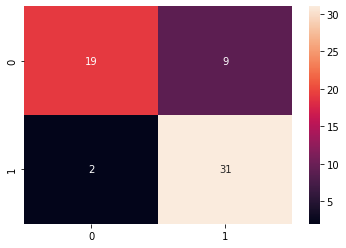

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)) , annot=True)


In [51]:
print(classification_report(y_test, y_pred.round()))


              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [52]:
from tensorflow import keras


In [53]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [54]:
model=keras.Sequential([keras.layers.Dense(100,activation='relu'),
                           keras.layers.Dense(1,activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train,epochs=20,batch_size=8,validation_split=0.2,callbacks=[callback],verbose=1)

2022-03-04 08:19:27.425013: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-04 08:19:27.545093: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
24/24 [==============================] - 1s 13ms/step - loss: 0.5808 - acc: 0.7135 - val_loss: 0.4856 - val_acc: 0.8776
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 0.4724 - acc: 0.8229 - val_loss: 0.3914 - val_acc: 0.9184
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 0.4161 - acc: 0.8333 - val_loss: 0.3508 - val_acc: 0.8980
Epoch 4/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3860 - acc: 0.8385 - val_loss: 0.3261 - val_acc: 0.8980
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3660 - acc: 0.8333 - val_loss: 0.3183 - val_acc: 0.8980
Epoch 6/20
24/24 [==============================] - 0s 4ms/step - loss: 0.3505 - acc: 0.8281 - val_loss: 0.3125 - val_acc: 0.8776
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3376 - acc: 0.8333 - val_loss: 0.3099 - val_acc: 0.8776
Epoch 8/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3277 - acc: 0.8

In [55]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

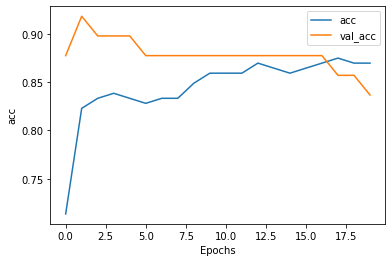

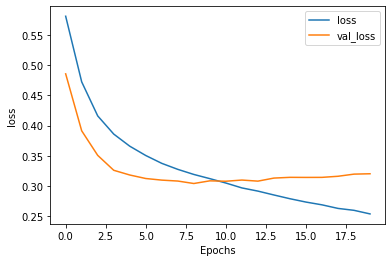

In [56]:
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [57]:
y_pred_deep=model.predict(X_test)


<AxesSubplot:>

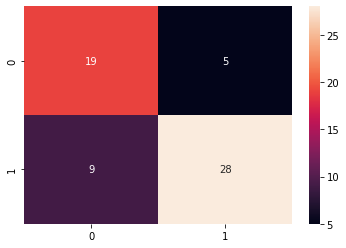

In [58]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_pred_deep.round(),y_test)) , annot=True)


In [59]:
print(classification_report(y_test, y_pred_deep.round()))


              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.76      0.85      0.80        33

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61

